In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


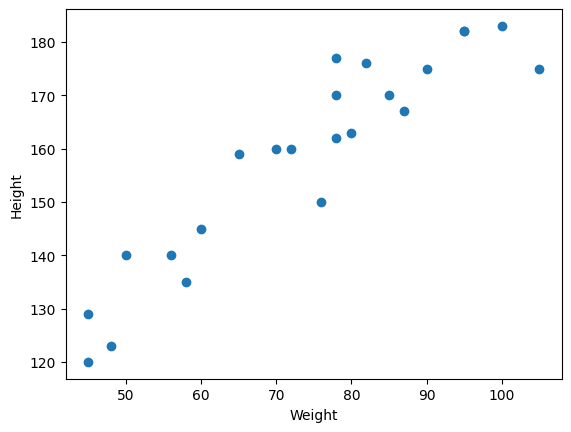

In [4]:
# Scatter Plot

plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [5]:
# finding Correlation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


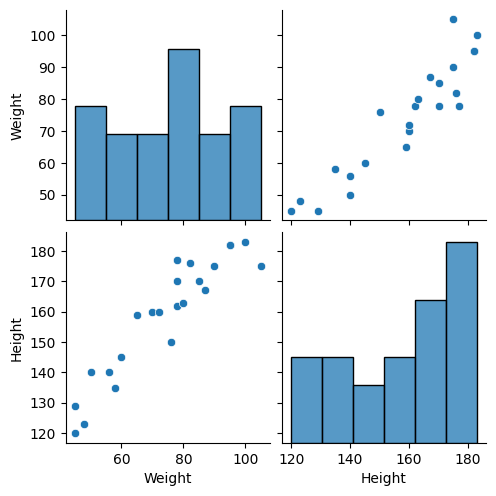

In [6]:
sns.pairplot(df)

In [7]:
# independent and dependent features

x=df[['Weight']] # independent variable should be in 2D array =r dataframe
y=df['Height']

In [8]:
x_series=df['Weight']
np.array(x_series).shape

(23,)

In [9]:
np.array(y).shape

(23,)

In [10]:
# Tarin test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [11]:
x_train.shape, x_test.shape

((16, 1), (7, 1))

In [12]:
y_train.shape, y_test.shape

((16,), (7,))

In [13]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [15]:
reg.coef_

array([15.52199696])

In [16]:
reg.intercept_

160.125

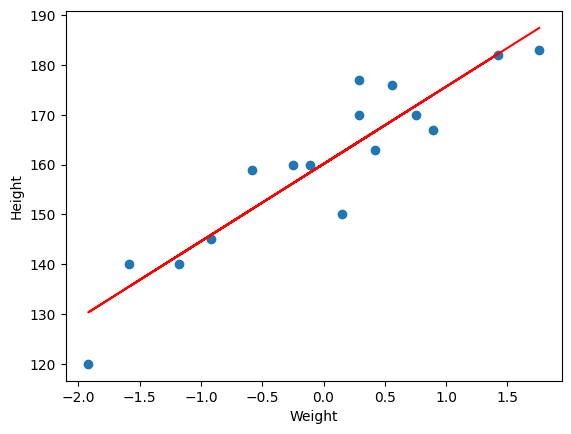

In [17]:
# plotting the best fit line

plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='r')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [18]:
y_pred=reg.predict(x_test)
y_pred

array([164.60037366, 143.84501755, 177.05358733, 133.46733949,
       182.24242636, 192.62010442, 130.35403607])

In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [20]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print('Mean Squared Error= ',mse)
print('Mean Absolute Error=',mae)

# RMSE
rmse=np.sqrt(mse)
print('Root Mean Squared Error= ',rmse)

Mean Squared Error=  73.01985134452866
Mean Absolute Error= 6.168983554379305
Root Mean Squared Error=  8.54516537841888


In [21]:
from sklearn.metrics import r2_score

In [22]:
score=r2_score(y_test,y_pred)

print("R2 Score= ",score)

R2 Score=  0.8609415967399182
